In [1]:
"""
Class: Stat232C
Project 3: Goal Inference
Name:
Date: May, 2020

"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


class ValueIteration(object):
    def __init__(self, transitionTable, rewardTable, convergenceTolerance, gamma):
        self.transitionTable = transitionTable
        self.rewardTable  = rewardTable
        self.valueTable = dict.fromkeys(transitionTable, 0)
        self.convergenceTolerance = convergenceTolerance
        self.gamma = gamma

    def __call__(self):
        #######################################
        ########## YOUR CODE HERE #############
        #######################################
        
        
        policyTableTemp = dict.fromkeys(self.valueTable)
        
        while True:
            delta=0
            for s, oldvalue in self.valueTable.items():
                v = oldvalue
                
                maxActionIdx=[]
                maxVal=0
                
                
                policyTableTemp[s]={}
                
                for action, snewP in self.transitionTable[s].items():
                    temp=0
                    
                    for snew, P in self.transitionTable[s][action].items():
                        r= self.rewardTable[s][action][snew]
                        temp += P*(r + self.gamma * self.valueTable[snew])
                    
                    #if s==(1,4):
                    #    print(action, temp, maxVal)
                        
                        
                    if round(temp, 3)> round(maxVal, 3):
                        maxVal=temp
                        maxActionIdx=[action]
                    elif round(temp, 3) == round(maxVal, 3):    
                        maxActionIdx.append( action )
                       
                                     
                          
                
                self.valueTable[s]= maxVal
                
                if maxVal!=0:
                    
                    for i in range(len(maxActionIdx)):
                        policyTableTemp[s][maxActionIdx[i]]= 1./len(maxActionIdx)               
                
                delta=max(delta, abs(v- self.valueTable[s]))
                
                
            if delta < self.convergenceTolerance:
                break
            
            policyTable={k: v for k, v in policyTableTemp.items() if v is not None}
            


        return ([self.valueTable, policyTable])



def visualizeValueTable(gridWidth, gridHeight, goalState, trapStates, valueTable):
    gridAdjust = .5
    gridScale = 1.5
    
    xs = np.linspace(-gridAdjust, gridWidth-gridAdjust, gridWidth+1)
    ys = np.linspace(-gridAdjust, gridHeight-gridAdjust, gridHeight+1)
    
    plt.rcParams["figure.figsize"] = [gridWidth*gridScale,gridHeight*gridScale]
    ax = plt.gca(frameon=False, xticks = range(gridWidth), yticks = range(gridHeight))

    #goal and trap coloring 
    for goal in goalState: 
        ax.add_patch(Rectangle((goal[0]-gridAdjust, goal[1]-gridAdjust), 1, 1, fill=True, color='green', alpha=.1))
    
    for (trapx, trapy) in trapStates:
        ax.add_patch(Rectangle((trapx-gridAdjust, trapy-gridAdjust), 1, 1, fill=True, color='black', alpha=.1))
    
    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color = "black")
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color = "black")

    #labeled values
    for (statex, statey), val in valueTable.items():
        plt.text(statex-.2, statey, str(round(val, 3)))    

    plt.show()


def visualizePolicy(gridWidth, gridHeight, goalState, trapStates, policy):
    #grid height/width
    gridAdjust = .5
    gridScale = 1.5
    arrowScale = .5
    
    xs = np.linspace(-gridAdjust, gridWidth-gridAdjust, gridWidth+1)
    ys = np.linspace(-gridAdjust, gridHeight-gridAdjust, gridHeight+1)
    
    plt.rcParams["figure.figsize"] = [gridWidth*gridScale,gridHeight*gridScale]
    ax = plt.gca(frameon=False, xticks = range(gridWidth), yticks = range(gridHeight))

    #goal and trap coloring 
    for goal in goalState:    
        ax.add_patch(Rectangle((goal[0]-gridAdjust, goal[1]-gridAdjust), 1, 1, fill=True, color='green', alpha=.1))
    
    for (trapx, trapy) in trapStates:
        ax.add_patch(Rectangle((trapx-gridAdjust, trapy-gridAdjust), 1, 1, fill=True, color='black', alpha=.1))

    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color = "black")
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color = "black")

    #labeled values
    for (statex, statey), actionDict in policy.items():
        for (optimalActionX, optimalActionY), actionProb in actionDict.items():
            plt.arrow(statex, statey, optimalActionX*actionProb*arrowScale, optimalActionY*actionProb*arrowScale, head_width=0.05*actionProb, head_length=0.1*actionProb)    

    plt.show()


def viewDictionaryStructure(d, levels, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(levels[indent]) + ": "+ str(key))
        if isinstance(value, dict):
            viewDictionaryStructure(value, levels, indent+1)
        else:
            print('\t' * (indent+1) + str(levels[indent+1])+ ": " + str(value))




## Main function

In [2]:
    gamma = .95
    beta = .4
    transition = {(0, 0): {(1, 0): {(1, 0): 1},(0, 1): {(0, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(0, 0): 1},(-1, 1): {(0, 0): 1},(1, -1): {(0, 0): 1},(1, 1): {(1, 1): 1},(-1, -1): {(0, 0): 1}},(0, 1): {(1, 0): {(1, 1): 1},(0, 1): {(0, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(0, 0): 1},(-1, 1): {(0, 1): 1},(1, -1): {(1, 0): 1},(1, 1): {(1, 2): 1},(-1, -1): {(0, 1): 1}},(0, 2): {(1, 0): {(1, 2): 1},(0, 1): {(0, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(0, 1): 1},(-1, 1): {(0, 2): 1},(1, -1): {(1, 1): 1},(1, 1): {(1, 3): 1},(-1, -1): {(0, 2): 1}},(0, 3): {(1, 0): {(1, 3): 1},(0, 1): {(0, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(0, 2): 1},(-1, 1): {(0, 3): 1},(1, -1): {(1, 2): 1},(1, 1): {(1, 4): 1},(-1, -1): {(0, 3): 1}},(0, 4): {(1, 0): {(1, 4): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(0, 3): 1},(-1, 1): {(0, 4): 1},(1, -1): {(1, 3): 1},(1, 1): {(1, 5): 1},(-1, -1): {(0, 4): 1}},(0, 5): {(1, 0): {(1, 5): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(0, 4): 1},(-1, 1): {(0, 5): 1},(1, -1): {(1, 4): 1},(1, 1): {(0, 5): 1},(-1, -1): {(0, 5): 1}},(1, 0): {(1, 0): {(2, 0): 1},(0, 1): {(1, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(1, 0): 1},(-1, 1): {(0, 1): 1},(1, -1): {(1, 0): 1},(1, 1): {(2, 1): 1},(-1, -1): {(1, 0): 1}},(1, 1): {(1, 0): {(2, 1): 1},(0, 1): {(1, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(1, 0): 1},(-1, 1): {(0, 2): 1},(1, -1): {(2, 0): 1},(1, 1): {(2, 2): 1},(-1, -1): {(0, 0): 1}},(1, 2): {(1, 0): {(2, 2): 1},(0, 1): {(1, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(1, 1): 1},(-1, 1): {(0, 3): 1},(1, -1): {(2, 1): 1},(1, 1): {(2, 3): 1},(-1, -1): {(0, 1): 1}},(1, 3): {(1, 0): {(2, 3): 1},(0, 1): {(1, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(1, 2): 1},(-1, 1): {(0, 4): 1},(1, -1): {(2, 2): 1},(1, 1): {(2, 4): 1},(-1, -1): {(0, 2): 1}},(1, 4): {(1, 0): {(2, 4): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(1, 3): 1},(-1, 1): {(0, 5): 1},(1, -1): {(2, 3): 1},(1, 1): {(2, 5): 1},(-1, -1): {(0, 3): 1}},(1, 5): {(1, 0): {(2, 5): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(1, 4): 1},(-1, 1): {(1, 5): 1},(1, -1): {(2, 4): 1},(1, 1): {(1, 5): 1},(-1, -1): {(0, 4): 1}},(2, 0): {(1, 0): {(3, 0): 1},(0, 1): {(2, 1): 1},(-1, 0): {(1, 0): 1},(0, -1): {(2, 0): 1},(-1, 1): {(1, 1): 1},(1, -1): {(2, 0): 1},(1, 1): {(3, 1): 1},(-1, -1): {(2, 0): 1}},(2, 1): {(1, 0): {(3, 1): 1},(0, 1): {(2, 2): 1},(-1, 0): {(1, 1): 1},(0, -1): {(2, 0): 1},(-1, 1): {(1, 2): 1},(1, -1): {(3, 0): 1},(1, 1): {(3, 2): 1},(-1, -1): {(1, 0): 1}},(2, 2): {(1, 0): {(3, 2): 1},(0, 1): {(2, 3): 1},(-1, 0): {(1, 2): 1},(0, -1): {(2, 1): 1},(-1, 1): {(1, 3): 1},(1, -1): {(3, 1): 1},(1, 1): {(3, 3): 1},(-1, -1): {(1, 1): 1}},(2, 3): {(1, 0): {(3, 3): 1},(0, 1): {(2, 4): 1},(-1, 0): {(1, 3): 1},(0, -1): {(2, 2): 1},(-1, 1): {(1, 4): 1},(1, -1): {(3, 2): 1},(1, 1): {(3, 4): 1},(-1, -1): {(1, 2): 1}},(2, 4): {(1, 0): {(3, 4): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 4): 1},(0, -1): {(2, 3): 1},(-1, 1): {(1, 5): 1},(1, -1): {(3, 3): 1},(1, 1): {(3, 5): 1},(-1, -1): {(1, 3): 1}},(2, 5): {(1, 0): {(3, 5): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 5): 1},(0, -1): {(2, 4): 1},(-1, 1): {(2, 5): 1},(1, -1): {(3, 4): 1},(1, 1): {(2, 5): 1},(-1, -1): {(1, 4): 1}},(3, 0): {(1, 0): {(4, 0): 1},(0, 1): {(3, 1): 1},(-1, 0): {(2, 0): 1},(0, -1): {(3, 0): 1},(-1, 1): {(2, 1): 1},(1, -1): {(3, 0): 1},(1, 1): {(4, 1): 1},(-1, -1): {(3, 0): 1}},(3, 1): {(1, 0): {(4, 1): 1},(0, 1): {(3, 2): 1},(-1, 0): {(2, 1): 1},(0, -1): {(3, 0): 1},(-1, 1): {(2, 2): 1},(1, -1): {(4, 0): 1},(1, 1): {(4, 2): 1},(-1, -1): {(2, 0): 1}},(3, 2): {(1, 0): {(4, 2): 1},(0, 1): {(3, 3): 1},(-1, 0): {(2, 2): 1},(0, -1): {(3, 1): 1},(-1, 1): {(2, 3): 1},(1, -1): {(4, 1): 1},(1, 1): {(4, 3): 1},(-1, -1): {(2, 1): 1}},(3, 3): {(1, 0): {(4, 3): 1},(0, 1): {(3, 4): 1},(-1, 0): {(2, 3): 1},(0, -1): {(3, 2): 1},(-1, 1): {(2, 4): 1},(1, -1): {(4, 2): 1},(1, 1): {(4, 4): 1},(-1, -1): {(2, 2): 1}},(3, 4): {(1, 0): {(4, 4): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 4): 1},(0, -1): {(3, 3): 1},(-1, 1): {(2, 5): 1},(1, -1): {(4, 3): 1},(1, 1): {(4, 5): 1},(-1, -1): {(2, 3): 1}},(3, 5): {(1, 0): {(4, 5): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 5): 1},(0, -1): {(3, 4): 1},(-1, 1): {(3, 5): 1},(1, -1): {(4, 4): 1},(1, 1): {(3, 5): 1},(-1, -1): {(2, 4): 1}},(4, 0): {(1, 0): {(5, 0): 1},(0, 1): {(4, 1): 1},(-1, 0): {(3, 0): 1},(0, -1): {(4, 0): 1},(-1, 1): {(3, 1): 1},(1, -1): {(4, 0): 1},(1, 1): {(5, 1): 1},(-1, -1): {(4, 0): 1}},(4, 1): {(1, 0): {(5, 1): 1},(0, 1): {(4, 2): 1},(-1, 0): {(3, 1): 1},(0, -1): {(4, 0): 1},(-1, 1): {(3, 2): 1},(1, -1): {(5, 0): 1},(1, 1): {(5, 2): 1},(-1, -1): {(3, 0): 1}},(4, 2): {(1, 0): {(5, 2): 1},(0, 1): {(4, 3): 1},(-1, 0): {(3, 2): 1},(0, -1): {(4, 1): 1},(-1, 1): {(3, 3): 1},(1, -1): {(5, 1): 1},(1, 1): {(5, 3): 1},(-1, -1): {(3, 1): 1}},(4, 3): {(1, 0): {(5, 3): 1},(0, 1): {(4, 4): 1},(-1, 0): {(3, 3): 1},(0, -1): {(4, 2): 1},(-1, 1): {(3, 4): 1},(1, -1): {(5, 2): 1},(1, 1): {(5, 4): 1},(-1, -1): {(3, 2): 1}},(4, 4): {(1, 0): {(5, 4): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 4): 1},(0, -1): {(4, 3): 1},(-1, 1): {(3, 5): 1},(1, -1): {(5, 3): 1},(1, 1): {(5, 5): 1},(-1, -1): {(3, 3): 1}},(4, 5): {(1, 0): {(5, 5): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 5): 1},(0, -1): {(4, 4): 1},(-1, 1): {(4, 5): 1},(1, -1): {(5, 4): 1},(1, 1): {(4, 5): 1},(-1, -1): {(3, 4): 1}},(5, 0): {(1, 0): {(6, 0): 1},(0, 1): {(5, 1): 1},(-1, 0): {(4, 0): 1},(0, -1): {(5, 0): 1},(-1, 1): {(4, 1): 1},(1, -1): {(5, 0): 1},(1, 1): {(6, 1): 1},(-1, -1): {(5, 0): 1}},(5, 1): {(1, 0): {(6, 1): 1},(0, 1): {(5, 2): 1},(-1, 0): {(4, 1): 1},(0, -1): {(5, 0): 1},(-1, 1): {(4, 2): 1},(1, -1): {(6, 0): 1},(1, 1): {(6, 2): 1},(-1, -1): {(4, 0): 1}},(5, 2): {(1, 0): {(6, 2): 1},(0, 1): {(5, 3): 1},(-1, 0): {(4, 2): 1},(0, -1): {(5, 1): 1},(-1, 1): {(4, 3): 1},(1, -1): {(6, 1): 1},(1, 1): {(6, 3): 1},(-1, -1): {(4, 1): 1}},(5, 3): {(1, 0): {(6, 3): 1},(0, 1): {(5, 4): 1},(-1, 0): {(4, 3): 1},(0, -1): {(5, 2): 1},(-1, 1): {(4, 4): 1},(1, -1): {(6, 2): 1},(1, 1): {(6, 4): 1},(-1, -1): {(4, 2): 1}},(5, 4): {(1, 0): {(6, 4): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 4): 1},(0, -1): {(5, 3): 1},(-1, 1): {(4, 5): 1},(1, -1): {(6, 3): 1},(1, 1): {(6, 5): 1},(-1, -1): {(4, 3): 1}},(5, 5): {(1, 0): {(6, 5): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 5): 1},(0, -1): {(5, 4): 1},(-1, 1): {(5, 5): 1},(1, -1): {(6, 4): 1},(1, 1): {(5, 5): 1},(-1, -1): {(4, 4): 1}},(6, 0): {(1, 0): {(6, 0): 1},(0, 1): {(6, 1): 1},(-1, 0): {(5, 0): 1},(0, -1): {(6, 0): 1},(-1, 1): {(5, 1): 1},(1, -1): {(6, 0): 1},(1, 1): {(6, 0): 1},(-1, -1): {(6, 0): 1}},(6, 1): {(1, 0): {(6, 1): 1},(0, 1): {(6, 2): 1},(-1, 0): {(5, 1): 1},(0, -1): {(6, 0): 1},(-1, 1): {(5, 2): 1},(1, -1): {(6, 1): 1},(1, 1): {(6, 1): 1},(-1, -1): {(5, 0): 1}},(6, 2): {(1, 0): {(6, 2): 1},(0, 1): {(6, 3): 1},(-1, 0): {(5, 2): 1},(0, -1): {(6, 1): 1},(-1, 1): {(5, 3): 1},(1, -1): {(6, 2): 1},(1, 1): {(6, 2): 1},(-1, -1): {(5, 1): 1}},(6, 3): {(1, 0): {(6, 3): 1},(0, 1): {(6, 4): 1},(-1, 0): {(5, 3): 1},(0, -1): {(6, 2): 1},(-1, 1): {(5, 4): 1},(1, -1): {(6, 3): 1},(1, 1): {(6, 3): 1},(-1, -1): {(5, 2): 1}},(6, 4): {(1, 0): {(6, 4): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 4): 1},(0, -1): {(6, 3): 1},(-1, 1): {(5, 5): 1},(1, -1): {(6, 4): 1},(1, 1): {(6, 4): 1},(-1, -1): {(5, 3): 1}},(6, 5): {(1, 0): {(6, 5): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 5): 1},(0, -1): {(6, 4): 1},(-1, 1): {(6, 5): 1},(1, -1): {(6, 5): 1},(1, 1): {(6, 5): 1},(-1, -1): {(5, 4): 1}}}

    #Observed Trajectories
    trajectoryToGoalA = [(0,0), (1,1), (1,2), (2,3), (3,4), (4,4), (5,4), (6,4)]
    trajectoryToGoalB = [(0,0), (1,1), (2,2), (2,3), (3,4), (4,3), (5,2), (6,1)]
    trajectoryToGoalC = [(0,0), (0,1), (1,2), (1,3), (1,4), (1,5)]

    #Environment 1: Solid  Barrier
    rewardA = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 2): -100},(1, -1): {(4, 0): -100},(1, 1): {(4, 2): -100},(-1, -1): {(2, 0): -100}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): 10},(-1, 0): {(5, 4): 10},(0, -1): {(6, 3): 10},(-1, 1): {(5, 5): 10},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): 10}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
    rewardB = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 2): -100},(1, -1): {(4, 0): -100},(1, 1): {(4, 2): -100},(-1, -1): {(2, 0): -100}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): 10},(-1, 0): {(5, 1): 10},(0, -1): {(6, 0): 10},(-1, 1): {(5, 2): 10},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): 10}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
    rewardC = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): 10},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): 10},(0, -1): {(1, 4): 10},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): 10},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): 10}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 2): -100},(1, -1): {(4, 0): -100},(1, 1): {(4, 2): -100},(-1, -1): {(2, 0): -100}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}

    #Environment 2: Barrier with a Gap
    rewardAGap = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -1.0},(0, 1): {(3, 2): -1.0},(-1, 0): {(2, 1): -1.0},(0, -1): {(3, 0): -1.0},(-1, 1): {(2, 2): -1.4142135623730951},(1, -1): {(4, 0): -1.4142135623730951},(1, 1): {(4, 2): -1.4142135623730951},(-1, -1): {(2, 0): -1.4142135623730951}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): 10},(-1, 0): {(5, 4): 10},(0, -1): {(6, 3): 10},(-1, 1): {(5, 5): 10},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): 10}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
    rewardBGap = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -1.0},(0, 1): {(3, 2): -1.0},(-1, 0): {(2, 1): -1.0},(0, -1): {(3, 0): -1.0},(-1, 1): {(2, 2): -1.4142135623730951},(1, -1): {(4, 0): -1.4142135623730951},(1, 1): {(4, 2): -1.4142135623730951},(-1, -1): {(2, 0): -1.4142135623730951}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): 10},(-1, 0): {(5, 1): 10},(0, -1): {(6, 0): 10},(-1, 1): {(5, 2): 10},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): 10}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
    rewardCGap = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): 10},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): 10},(0, -1): {(1, 4): 10},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): 10},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): 10}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -1.0},(0, 1): {(3, 2): -1.0},(-1, 0): {(2, 1): -1.0},(0, -1): {(3, 0): -1.0},(-1, 1): {(2, 2): -1.4142135623730951},(1, -1): {(4, 0): -1.4142135623730951},(1, 1): {(4, 2): -1.4142135623730951},(-1, -1): {(2, 0): -1.4142135623730951}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}


    #######################################
    ## Run value iteration to get boltzmann policies
    ## Can assume that at time 0 the prior over the goals is uniform
    ## Plot posteriors for each of the trajectories for each environment (3 trajectories x 2 environments)
    ######################################
    convergenceTolerance = 10e-7
    #valueTable = dict.fromkeys(transition, 0)
    
    
    goalStates = [(6, 1), (1, 5), (6, 4)]
    gridWidth = 7
    gridHeight = 6
    trapStates = [(3,0), (3,1), (3,2), (3,3)]

    #Environment 1: Solid  Barrier
    performValueIterationA = ValueIteration(transition, rewardA, convergenceTolerance, gamma)
    optimalValuesA, policyTableA = performValueIterationA()
    #print('optimalValues: {}'.format(optimalValues))
    #print('policyTable: {}'.format(policyTable))
    performValueIterationB = ValueIteration(transition, rewardB, convergenceTolerance, gamma)
    optimalValuesB, policyTableB = performValueIterationB()
    
    performValueIterationC = ValueIteration(transition, rewardC,  convergenceTolerance, gamma)
    optimalValuesC, policyTableC = performValueIterationC()
    
    
    #Environment 2: Barrier with a Gap
    performValueIterationA = ValueIteration(transition, rewardAGap, convergenceTolerance, gamma)
    optimalValuesAGap, policyTableAGap = performValueIterationA()
    #print('optimalValues: {}'.format(optimalValues))
    #print('policyTable: {}'.format(policyTable))
    performValueIterationB = ValueIteration(transition, rewardBGap,  convergenceTolerance, gamma)
    optimalValuesBGap, policyTableBGap = performValueIterationB()
    
    performValueIterationC = ValueIteration(transition, rewardCGap, convergenceTolerance, gamma)
    optimalValuesCGap, policyTableCGap = performValueIterationC()
    
    
    """
    Visualization Tools

    Uncomment to view transition or reward structure in a readable format

    """

    #levelsReward  = ["state", "action", "next state", "reward"]
    #levelsTransition  = ["state", "action", "next state", "probability"]
    #
    #viewDictionaryStructure(transition, levelsTransition)
    #viewDictionaryStructure(rewardTableDet, levelsReward)
    #
    #viewDictionaryStructure(transitionTableProb, levelsTransition)
    #viewDictionaryStructure(rewardTableProb, levelsReward)


    

'\nVisualization Tools\n\nUncomment to view transition or reward structure in a readable format\n\n'

## A visualization of the value table and policy for each goal (A, B, C) in each environment using the provided functions.

### Value Table and policy for goal A in Environment 1

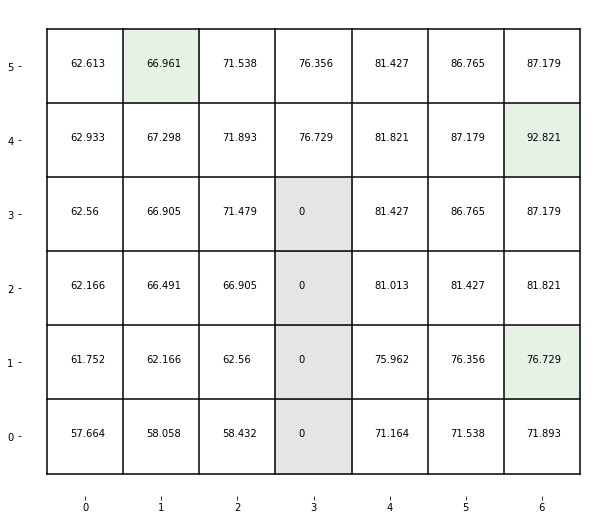

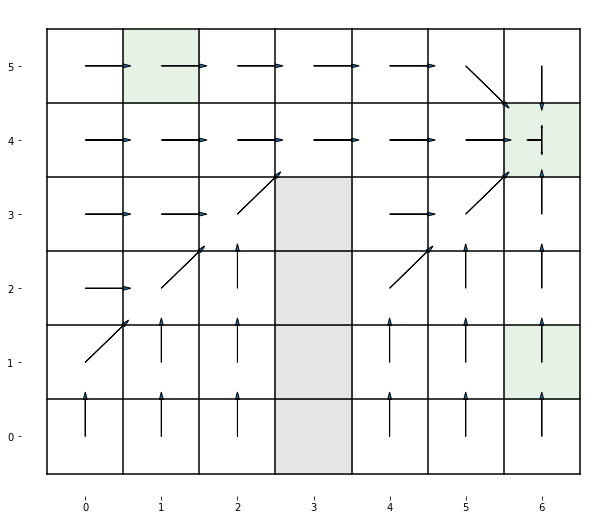

In [3]:
visualizeValueTable(gridWidth, gridHeight, goalStates, trapStates,  valueTable=optimalValuesA)
visualizePolicy(gridWidth, gridHeight, goalStates, trapStates, policy=policyTableA)

### Value Table and policy for goal B in Environment 1

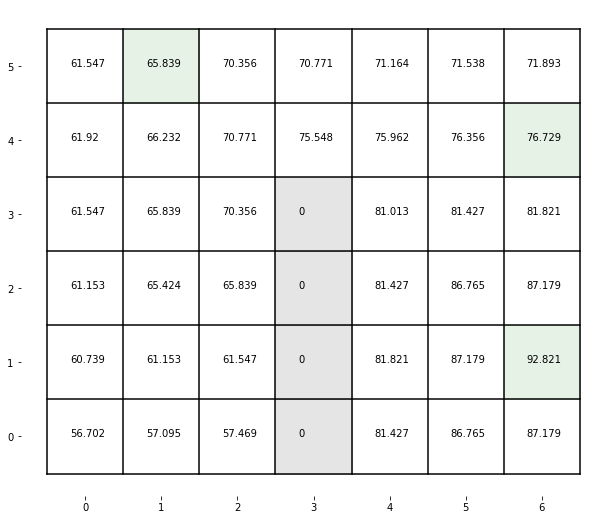

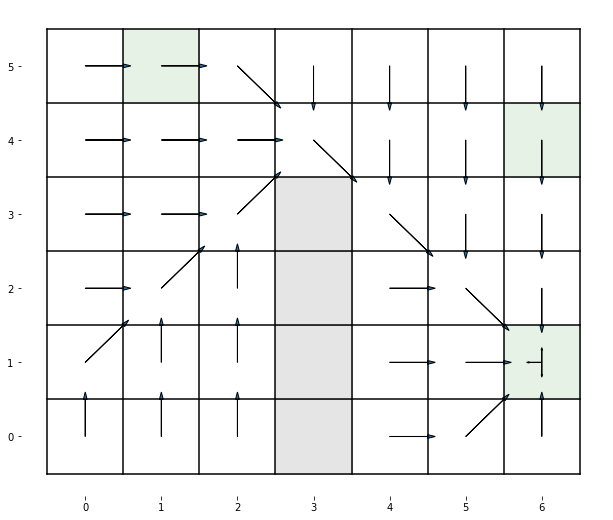

In [4]:
visualizeValueTable(gridWidth, gridHeight, goalStates, trapStates,  valueTable=optimalValuesB)
visualizePolicy(gridWidth, gridHeight, goalStates, trapStates, policy=policyTableB)


### Value Table and policy for goal C in Environment 1

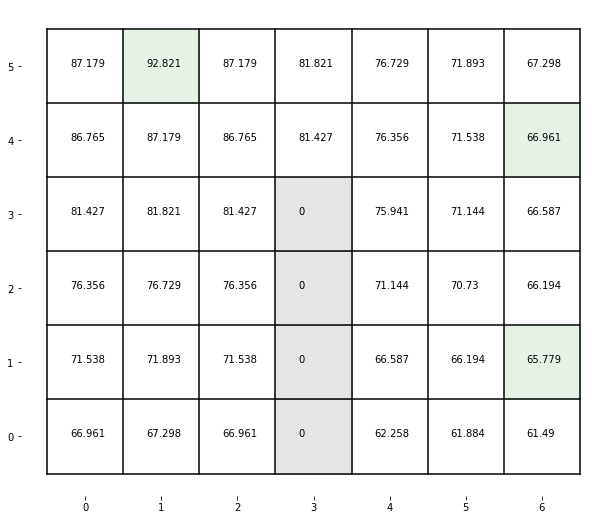

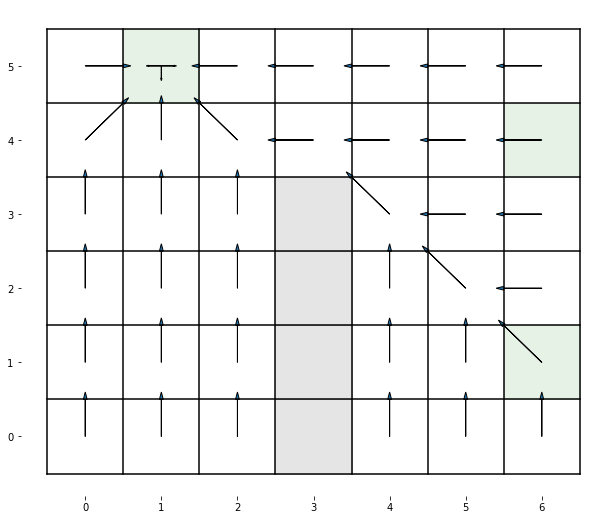

In [5]:
visualizeValueTable(gridWidth, gridHeight, goalStates, trapStates,  valueTable=optimalValuesC)
visualizePolicy(gridWidth, gridHeight, goalStates, trapStates, policy=policyTableC)


### Value Table and policy for goal A in Environment 2

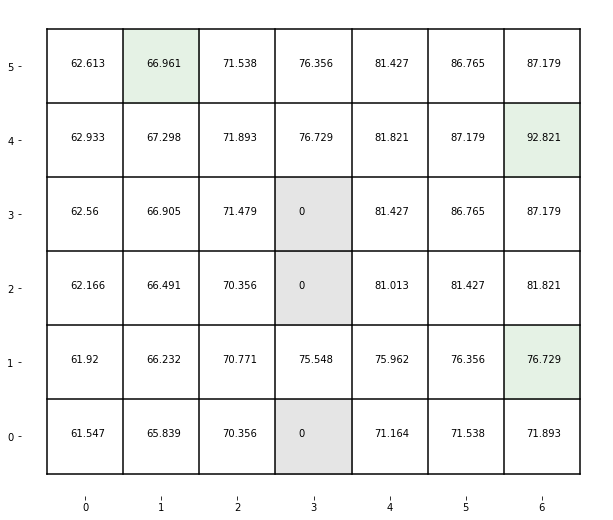

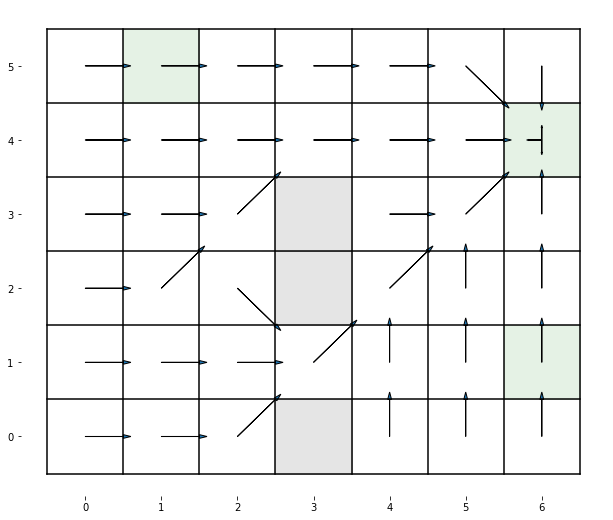

In [6]:
trapStates = [(3,0),  (3,2), (3,3)]
visualizeValueTable(gridWidth, gridHeight, goalStates, trapStates,  valueTable=optimalValuesAGap)
visualizePolicy(gridWidth, gridHeight, goalStates, trapStates, policy=policyTableAGap)


### Value Table and policy for goal B in Environment 2

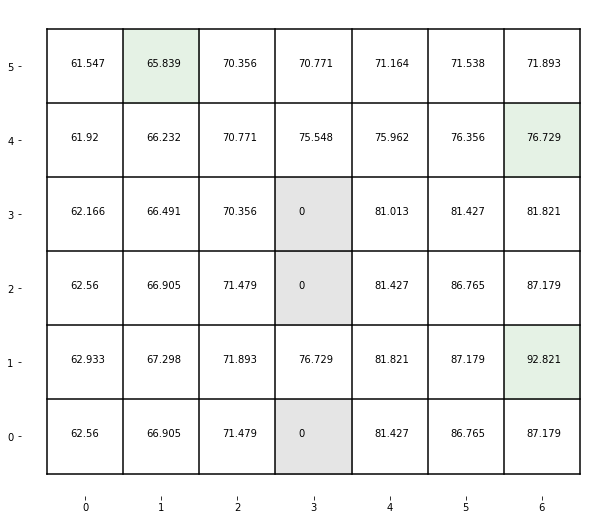

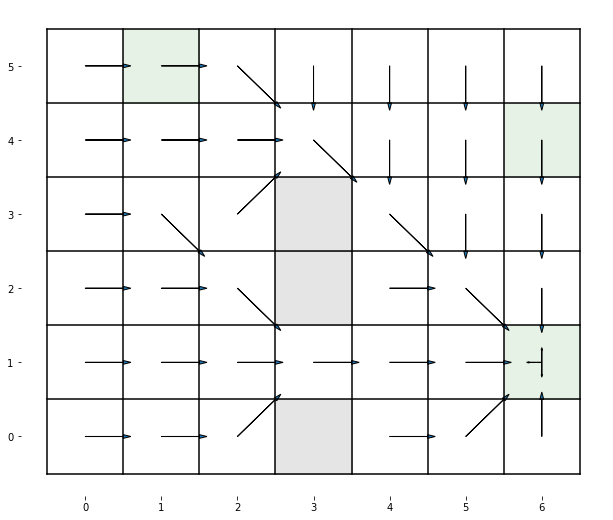

In [7]:

visualizeValueTable(gridWidth, gridHeight, goalStates, trapStates,  valueTable=optimalValuesBGap)
visualizePolicy(gridWidth, gridHeight, goalStates, trapStates, policy=policyTableBGap)



### Value Table and policy for goal C in Environment 2

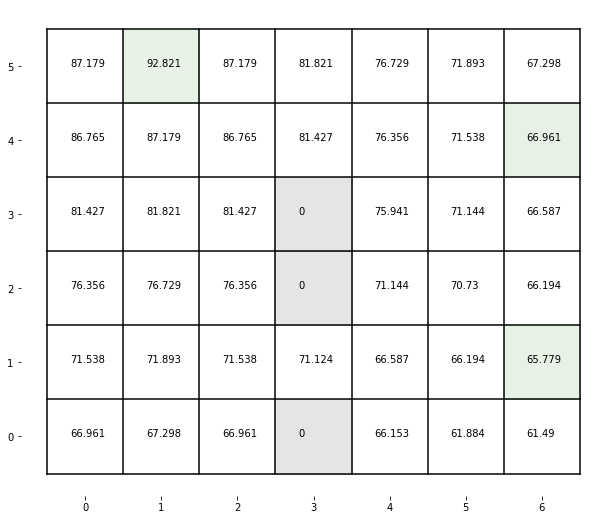

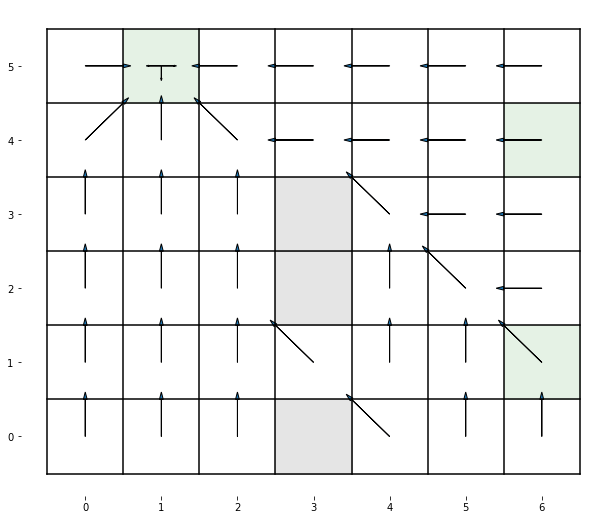

In [8]:
visualizeValueTable(gridWidth, gridHeight, goalStates, trapStates,  valueTable=optimalValuesCGap)
visualizePolicy(gridWidth, gridHeight, goalStates, trapStates, policy=policyTableCGap)

## A graph plotting the posterior probability of each goal at each time point for each given trajectory sequences.

In [9]:
def Qfunction(transitionTable, rewardTable, valueTable, gamma=0.95):
    QTableTemp = dict.fromkeys(valueTable)       

    for s, v in valueTable.items():
        QTableTemp[s]={}
        
        for action, snewP in transitionTable[s].items():
            Qvalue=0
            
            for snew, P in transitionTable[s][action].items():
                Qvalue += P*(rewardTable[s][action][snew] + gamma*valueTable[snew])
            
            QTableTemp[s][action]=Qvalue
            
    QTable={k: v for k, v in QTableTemp.items() if v is not None}
            
    return QTable          

    

In [10]:
def posterior(transitionTable, trajectory, rewardTable, policyTable, valueTable):
    
    QTable = Qfunction(transitionTable, rewardTable, valueTable, 0.95)
    
    
    ## Calculate pi(a|s,g)
    piTable = dict.fromkeys(valueTable) 
    beta=0.4

    for i in range(len(trajectory)-1):
        s=trajectory[i] 
        #print(i)
        temp={}
        for action, snewP in transitionTable[s].items():
            Qvalue=QTable[s][action]
            #print(Qvalue)
            temp[action]= np.exp(beta*Qvalue)
        ##normalize piTable[s]
        factor=1.0/sum(temp.values())
        piTable[s] = {k: v*factor for k, v in temp.items() }
    
    post_prob=[]
    for i in range(1, len(trajectory)):
        prob_product =1.
        
        for j in range(i, 0, -1):
                  
            s_current = trajectory[j]
            s_prev    = trajectory[j-1]
            
            prob_cur=0

            for action, snewP in transitionTable[s_prev].items():
                ### compute P(s_current|s_prev,g)
                
                temp={}
                for snew, P in transitionTable[s_prev][action].items():
                    if( snew==s_current):
                        
                        #Qvalue=QTable[s][action]
                        #temp[action]= np.exp(beta*Qvalue)
                        prob_cur += P * piTable[s_prev][action]
                        #print(P)
            #print(j)
            #print(prob_cur)    
            prob_product *= prob_cur
                        
        post_prob.append(prob_product)
        
    #post_prob=post_prob/sum(post_prob)
    
    return post_prob
        
        
        

### Trajectory to Goal A , Enviroment1

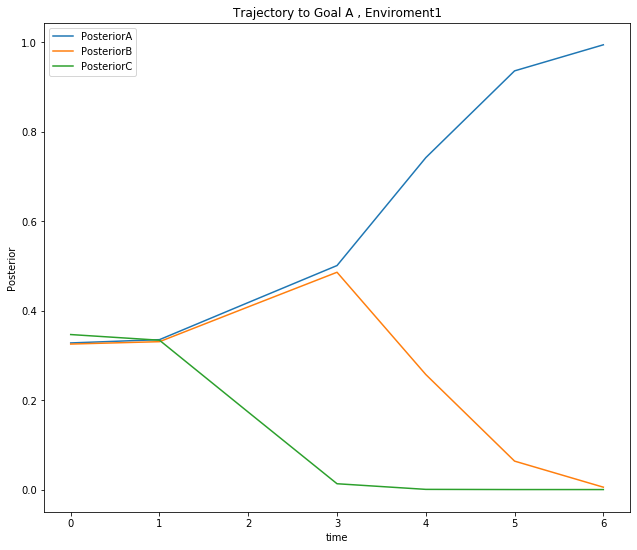

In [11]:
postA=posterior(transition, trajectoryToGoalA, rewardA, policyTableA , optimalValuesA)

postB=posterior(transition, trajectoryToGoalA, rewardB, policyTableB , optimalValuesB)

postC=posterior(transition, trajectoryToGoalA, rewardC, policyTableC , optimalValuesC)

### normalize posterior probability

for i in range(len(postA)):
    sum_temp=postA[i]+postB[i]+postC[i]
    postA[i]=postA[i]/sum_temp
    postB[i]=postB[i]/sum_temp
    postC[i]=postC[i]/sum_temp


plt.plot(postA, label='PosteriorA')
plt.plot(postB, label='PosteriorB')
plt.plot(postC, label='PosteriorC')
plt.xlabel('time')
plt.ylabel('Posterior')
plt.title('Trajectory to Goal A , Enviroment1')
plt.legend()

### Trajectory to Goal B , Enviroment1


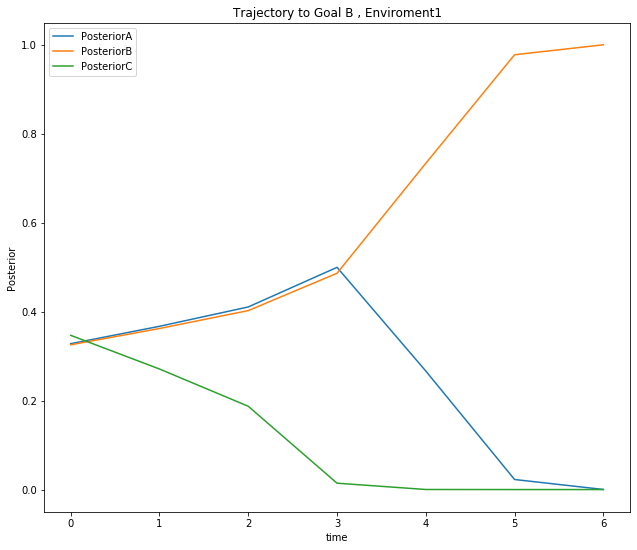

In [12]:
postA=posterior(transition, trajectoryToGoalB, rewardA, policyTableA , optimalValuesA)

postB=posterior(transition, trajectoryToGoalB, rewardB, policyTableB , optimalValuesB)

postC=posterior(transition, trajectoryToGoalB, rewardC, policyTableC , optimalValuesC)

### normalize posterior probability

for i in range(len(postA)):
    sum_temp=postA[i]+postB[i]+postC[i]
    postA[i]=postA[i]/sum_temp
    postB[i]=postB[i]/sum_temp
    postC[i]=postC[i]/sum_temp
    
plt.plot(postA, label='PosteriorA')
plt.plot(postB, label='PosteriorB')
plt.plot(postC, label='PosteriorC')
plt.xlabel('time')
plt.ylabel('Posterior')
plt.title('Trajectory to Goal B , Enviroment1')
plt.legend()

### Trajectory to Goal C , Enviroment1


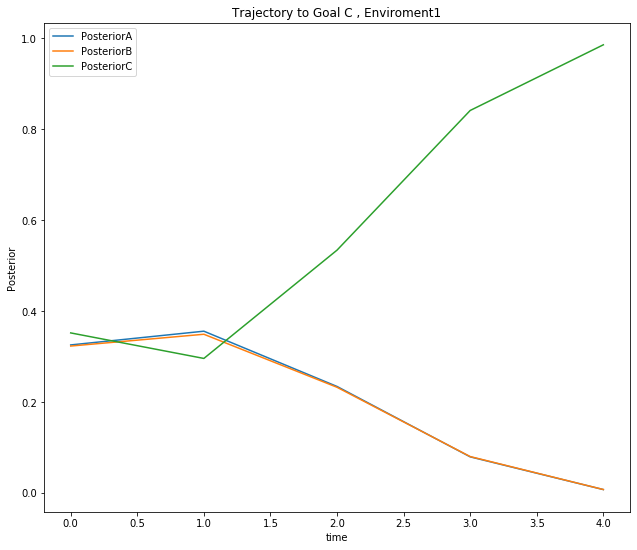

In [13]:
postA=posterior(transition, trajectoryToGoalC, rewardA, policyTableA , optimalValuesA)

postB=posterior(transition, trajectoryToGoalC, rewardB, policyTableB , optimalValuesB)

postC=posterior(transition, trajectoryToGoalC, rewardC, policyTableC , optimalValuesC)

### normalize posterior probability

for i in range(len(postA)):
    sum_temp=postA[i]+postB[i]+postC[i]
    postA[i]=postA[i]/sum_temp
    postB[i]=postB[i]/sum_temp
    postC[i]=postC[i]/sum_temp
    
plt.plot(postA, label='PosteriorA')
plt.plot(postB, label='PosteriorB')
plt.plot(postC, label='PosteriorC')
plt.xlabel('time')
plt.ylabel('Posterior')
plt.title('Trajectory to Goal C , Enviroment1')
plt.legend()

### Trajectory to Goal A , Enviroment2


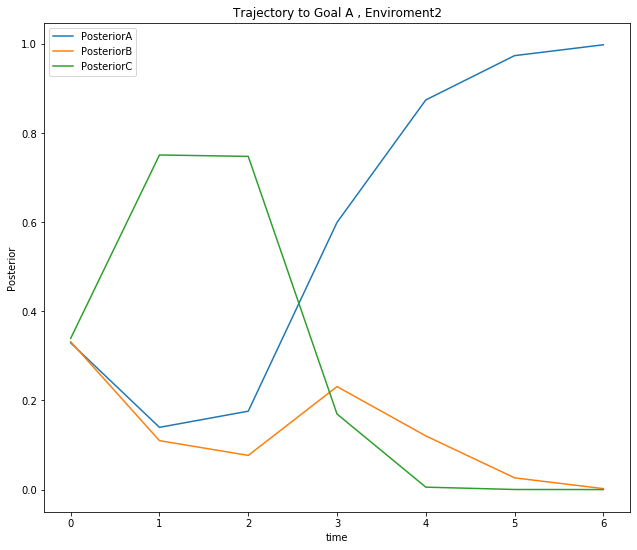

In [14]:
postA=posterior(transition, trajectoryToGoalA, rewardAGap, policyTableAGap , optimalValuesAGap)

postB=posterior(transition, trajectoryToGoalA, rewardBGap, policyTableBGap , optimalValuesBGap)

postC=posterior(transition, trajectoryToGoalA, rewardCGap, policyTableCGap , optimalValuesCGap)

### normalize posterior probability

for i in range(len(postA)):
    sum_temp=postA[i]+postB[i]+postC[i]
    postA[i]=postA[i]/sum_temp
    postB[i]=postB[i]/sum_temp
    postC[i]=postC[i]/sum_temp
    
plt.plot(postA, label='PosteriorA')
plt.plot(postB, label='PosteriorB')
plt.plot(postC, label='PosteriorC')
plt.xlabel('time')
plt.ylabel('Posterior')
plt.title('Trajectory to Goal A , Enviroment2')
plt.legend()

### Trajectory to Goal B , Enviroment2


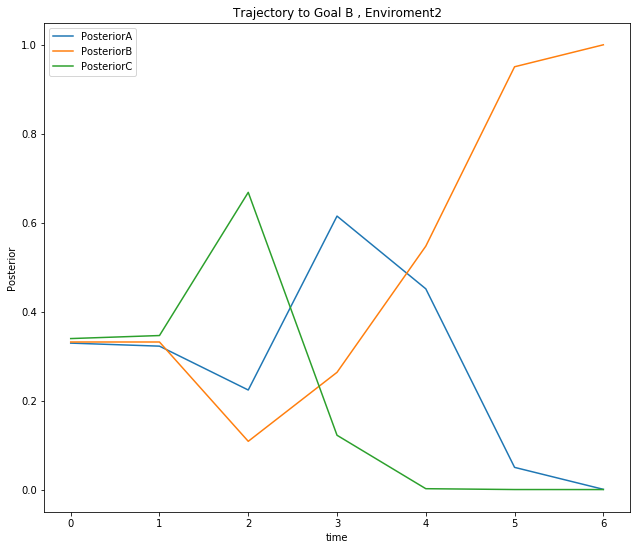

In [15]:
postA=posterior(transition, trajectoryToGoalB, rewardAGap, policyTableAGap , optimalValuesAGap)

postB=posterior(transition, trajectoryToGoalB, rewardBGap, policyTableBGap , optimalValuesBGap)

postC=posterior(transition, trajectoryToGoalB, rewardCGap, policyTableCGap , optimalValuesCGap)

### normalize posterior probability

for i in range(len(postA)):
    sum_temp=postA[i]+postB[i]+postC[i]
    postA[i]=postA[i]/sum_temp
    postB[i]=postB[i]/sum_temp
    postC[i]=postC[i]/sum_temp
    
plt.plot(postA, label='PosteriorA')
plt.plot(postB, label='PosteriorB')
plt.plot(postC, label='PosteriorC')
plt.xlabel('time')
plt.ylabel('Posterior')
plt.title('Trajectory to Goal B , Enviroment2')
plt.legend()

### Trajectory to Goal C , Enviroment2


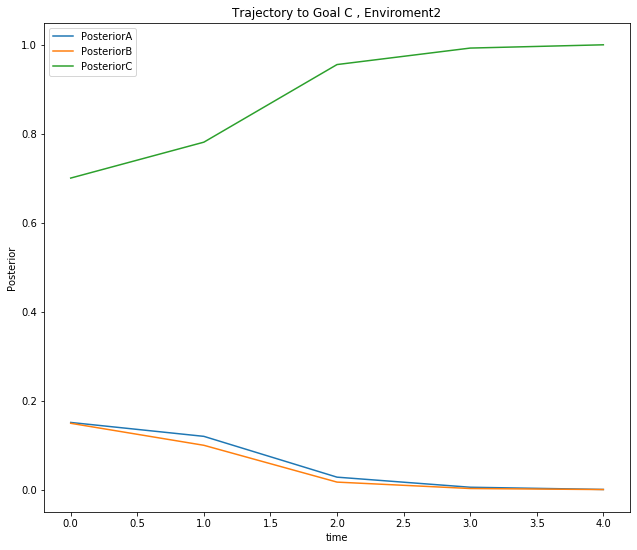

In [16]:
postA=posterior(transition, trajectoryToGoalC, rewardAGap, policyTableAGap , optimalValuesAGap)

postB=posterior(transition, trajectoryToGoalC, rewardBGap, policyTableBGap , optimalValuesBGap)

postC=posterior(transition, trajectoryToGoalC, rewardCGap, policyTableCGap , optimalValuesCGap)

### normalize posterior probability

for i in range(len(postA)):
    sum_temp=postA[i]+postB[i]+postC[i]
    postA[i]=postA[i]/sum_temp
    postB[i]=postB[i]/sum_temp
    postC[i]=postC[i]/sum_temp
    
plt.plot(postA, label='PosteriorA')
plt.plot(postB, label='PosteriorB')
plt.plot(postC, label='PosteriorC')
plt.xlabel('time')
plt.ylabel('Posterior')
plt.title('Trajectory to Goal C , Enviroment2')
plt.legend()